In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [3]:
np.random.seed(42)

rows = 6000

df = pd.DataFrame({
    "Rainfall": np.random.randint(400, 1500, rows),
    "Temperature": np.random.randint(20, 38, rows),
    "Humidity": np.random.randint(40, 85, rows),
    "Soil_pH": np.random.uniform(6.0, 7.8, rows),
    "Area": np.random.uniform(1.0, 7.0, rows)
})

df["Yield"] = (
    0.015 * df["Rainfall"] +
    0.9 * df["Temperature"] +
    0.7 * df["Humidity"] +
    2.5 * df["Area"] -
    1.0 * abs(7 - df["Soil_pH"]) +
    np.random.normal(0, 3, rows)
)

df.head()


,Rainfall,Temperature,Humidity,Soil_pH,Area,Yield
0,1260,27,71,7.745568,5.141461,103.656284
1,1495,33,84,6.353856,4.565637,124.095166
2,1444,37,81,7.628349,1.865684,119.167118
3,521,35,48,6.024880,1.995430,77.032193
4,866,28,50,6.981546,4.955354,88.505530


In [4]:
df.to_csv("crop_yield_dataset.csv", index=False)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rainfall     6000 non-null   int64  
 1   Temperature  6000 non-null   int64  
 2   Humidity     6000 non-null   int64  
 3   Soil_pH      6000 non-null   float64
 4   Area         6000 non-null   float64
 5   Yield        6000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 281.4 KB


In [6]:
df.describe()


,Rainfall,Temperature,Humidity,Soil_pH,Area,Yield
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,955.259167,28.652667,61.637833,6.892738,4.023223,92.883092
std,317.363061,5.198480,12.957944,0.518876,1.732902,12.392171
min,400.000000,20.000000,40.000000,6.000017,1.000123,52.146022
25%,677.750000,24.000000,50.000000,6.442682,2.528076,84.077511
50%,958.000000,29.000000,61.000000,6.887400,4.028319,92.701591
75%,1235.000000,33.000000,73.000000,7.334597,5.529075,101.891512
max,1499.000000,37.000000,84.000000,7.799451,6.999346,135.476603


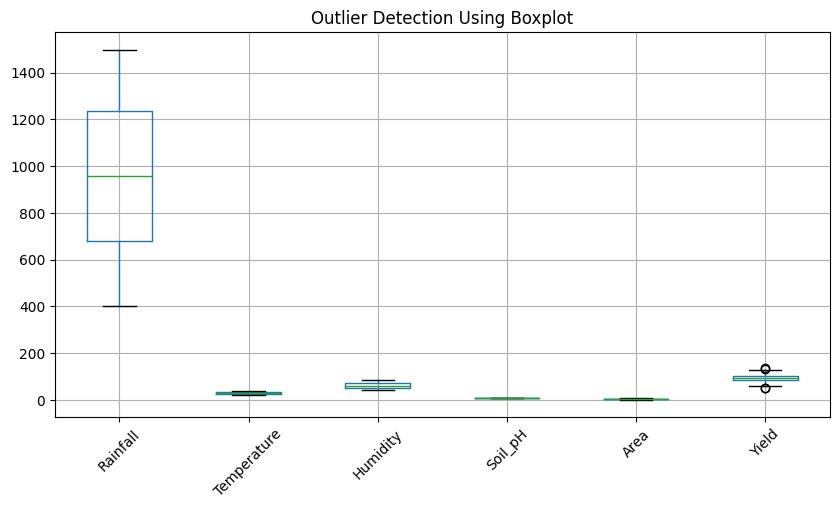

In [7]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection Using Boxplot")
plt.show()


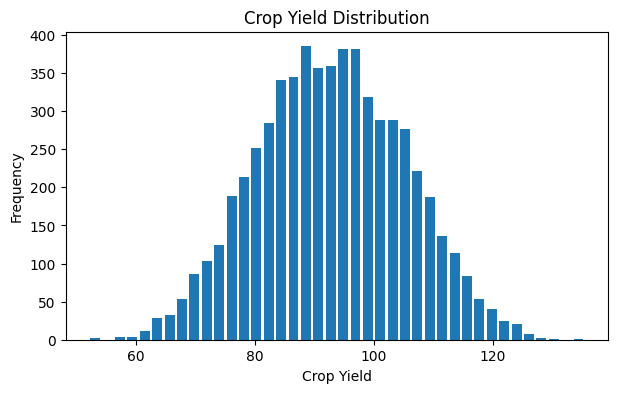

In [8]:
plt.figure(figsize=(7,4))
plt.hist(df['Yield'], bins=40, rwidth=0.8)
plt.xlabel("Crop Yield")
plt.ylabel("Frequency")
plt.title("Crop Yield Distribution")
plt.show()


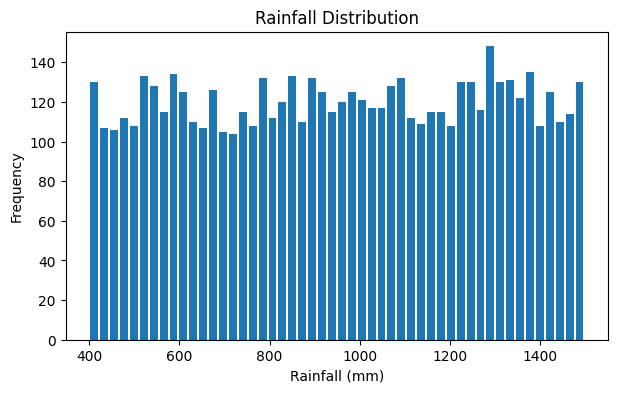

In [9]:
plt.figure(figsize=(7,4))
plt.hist(df['Rainfall'], bins=50, rwidth=0.8)
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Rainfall Distribution")
plt.show()


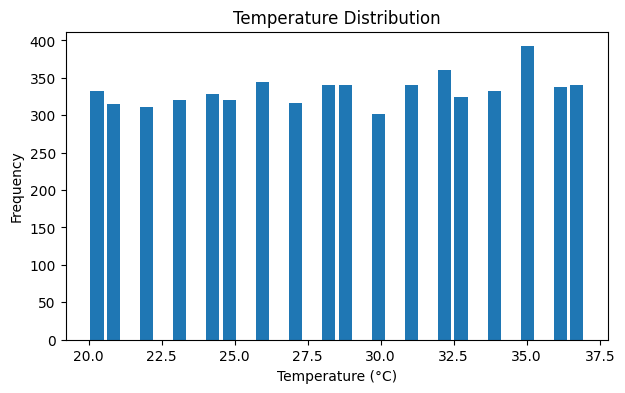

In [10]:
plt.figure(figsize=(7,4))
plt.hist(df['Temperature'], bins=30, rwidth=0.8)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.show()


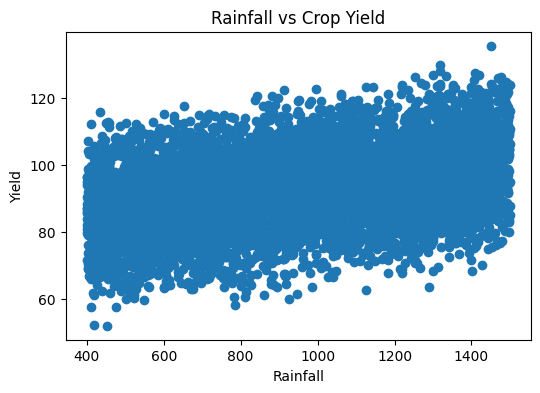

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(df['Rainfall'], df['Yield'])
plt.xlabel("Rainfall")
plt.ylabel("Yield")
plt.title("Rainfall vs Crop Yield")
plt.show()


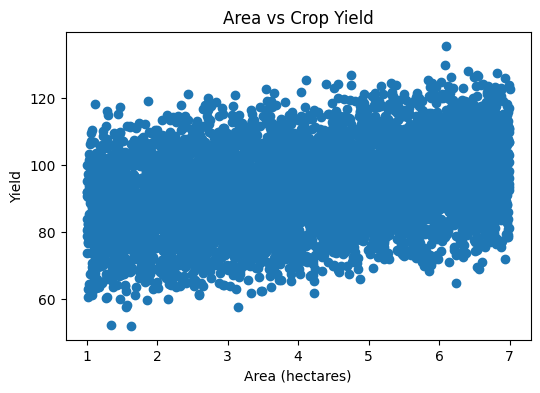

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(df['Area'], df['Yield'])
plt.xlabel("Area (hectares)")
plt.ylabel("Yield")
plt.title("Area vs Crop Yield")
plt.show()


In [13]:
corr = df.corr()
corr


,Rainfall,Temperature,Humidity,Soil_pH,Area,Yield
Rainfall,1.000000,-0.000858,-0.007695,0.021547,-0.001495,0.372877
Temperature,-0.000858,1.000000,0.005687,-0.017503,-0.009188,0.376018
Humidity,-0.007695,0.005687,1.000000,0.001700,-0.004511,0.732563
Soil_pH,0.021547,-0.017503,0.001700,1.000000,0.028507,0.022196
Area,-0.001495,-0.009188,-0.004511,0.028507,1.000000,0.343145
Yield,0.372877,0.376018,0.732563,0.022196,0.343145,1.000000


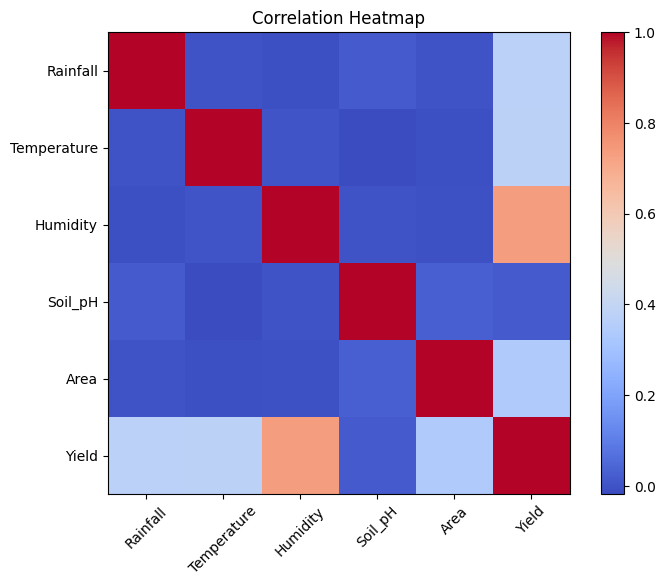

In [14]:
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.show()


In [15]:
X = df[['Rainfall', 'Temperature', 'Humidity', 'Soil_pH', 'Area']]
y = df['Yield']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred = model.predict(X_test)


In [19]:
r2 = r2_score(y_test, y_pred)
print("Model Accuracy (R² %):", round(r2 * 100, 2))


Model Accuracy (R² %): 93.74


In [20]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 2.4
Root Mean Squared Error (RMSE): 3.04


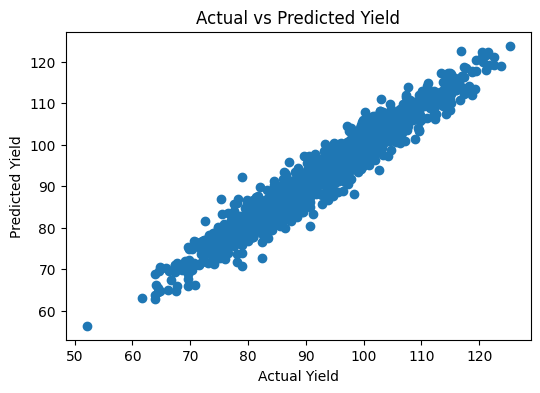

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()


In [22]:
sample_df = pd.DataFrame(
    [[900, 32, 65, 7.0, 4.0]],
    columns=['Rainfall', 'Temperature', 'Humidity', 'Soil_pH', 'Area']
)

pred = model.predict(sample_df)
print("Predicted Crop Yield:", round(pred[0], 2))


Predicted Crop Yield: 97.4
